### Project statement:
AAL, established in 2000, is a well-known brand in Australia, particularly recognized for its clothing business. It has opened branches in various states, 
metropolises, and tier-1 and tier-2 cities across the country.

The brand caters to all age groups, from kids to the elderly.

Currently experiencing a surge in business, AAL is actively pursuing expansion 
opportunities. To facilitate informed investment decisions, the CEO has assigned 
the responsibility to the head of AAL’s sales and marketing (S&M) department. 
The specific tasks include:

1) Identify the states that are generating the highest revenues.
2) Develop sales programs for states with lower revenues. The head of sales and marketing has requested your assistance with this task.

Analyze the sales data of the company for the fourth quarter in Australia, 
examining it on a state-by-state basis. Provide insights to assist the company in 
making data-driven decisions for the upcoming year

#### Perform the following steps:
As a data scientist, you must perform the following steps on the enclosed data:
1. Data wrangling
2. Data analysis
3. Data visualization
4. Report generation

#### 1. Data wrangling
a. Ensure that the data is clean and free from any missing or incorrect entries.
   - Inspect the data manually to identify missing or incorrect information using the functions isna() and notna().

In [3]:
import pandas as pd
df=pd.read_csv('AusApparalSales4thQrt2020.csv', parse_dates=['Date'], dtype={'Time': str, 'State': str, 'Group': str})
#The Date column is stored as an object and should be converted to a datetime format.
Date=pd.to_datetime(df['Date'])
print(df)
print(Date)
#Result: The dataset contains 7560 rows and 6 columns: Date, Time, State, Group, Unit, and Sales.
#Time, State, and Group are categorical variables.
#Unit and Sales are numerical columns and are suitable for normalization.

           Date        Time State     Group  Unit  Sales
0    2020-10-01     Morning    WA      Kids     8  20000
1    2020-10-01     Morning    WA       Men     8  20000
2    2020-10-01     Morning    WA     Women     4  10000
3    2020-10-01     Morning    WA   Seniors    15  37500
4    2020-10-01   Afternoon    WA      Kids     3   7500
...         ...         ...   ...       ...   ...    ...
7555 2020-12-30   Afternoon   TAS   Seniors    14  35000
7556 2020-12-30     Evening   TAS      Kids    15  37500
7557 2020-12-30     Evening   TAS       Men    15  37500
7558 2020-12-30     Evening   TAS     Women    11  27500
7559 2020-12-30     Evening   TAS   Seniors    13  32500

[7560 rows x 6 columns]
0      2020-10-01
1      2020-10-01
2      2020-10-01
3      2020-10-01
4      2020-10-01
          ...    
7555   2020-12-30
7556   2020-12-30
7557   2020-12-30
7558   2020-12-30
7559   2020-12-30
Name: Date, Length: 7560, dtype: datetime64[ns]


In [4]:
df.isna().sum()
#Result: No missing values were detected as all columns have the full count of non-null entries.

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [5]:
df.notna()

,Date,Time,State,Group,Unit,Sales
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,True,True,True,True
...,...,...,...,...,...,...
7555,True,True,True,True,True,True
7556,True,True,True,True,True,True
7557,True,True,True,True,True,True
7558,True,True,True,True,True,True


In [6]:
df.duplicated().sum()
#Result: No duplicate values were detected

0

In [7]:
df["Time"].dtype

dtype('O')

b. Based on your knowledge of data analytics, include your recommendations for treating missing and incorrect data (dropping the null values or filling them).

In [8]:
#There are no null values for this data
#inside sklearn, impute is a library and SimpleImputer is a function inside impute library
from sklearn.impute import SimpleImputer

df=pd.read_csv('AusApparalSales4thQrt2020.csv')
df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


In [9]:
#This uses SimpleImputer function with mean as the strategy for the null values in column x
imputing_object=SimpleImputer(strategy='mean')
#uses the imputing_object strategy to fit and transform the null values in column x
df['Sales']=imputing_object.fit_transform(df[['Sales']])
df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000.0
1,1-Oct-2020,Morning,WA,Men,8,20000.0
2,1-Oct-2020,Morning,WA,Women,4,10000.0
3,1-Oct-2020,Morning,WA,Seniors,15,37500.0
4,1-Oct-2020,Afternoon,WA,Kids,3,7500.0


c. Choose a suitable data wrangling technique—either data standardization or normalization. Execute the preferred normalization method and present the resulting data. (Normalization is the preferred approach for this problem.)


In [10]:
#First Convert the Non-numerical to numerical using LabelEncoder
#Time, State, and Group are categorical variables.
from sklearn.preprocessing import LabelEncoder 
# Encode 'State'
encoder = LabelEncoder()
df['State'] = encoder.fit_transform(df['State'])
df

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,6,Kids,8,20000.0
1,1-Oct-2020,Morning,6,Men,8,20000.0
2,1-Oct-2020,Morning,6,Women,4,10000.0
3,1-Oct-2020,Morning,6,Seniors,15,37500.0
4,1-Oct-2020,Afternoon,6,Kids,3,7500.0
...,...,...,...,...,...,...
7555,30-Dec-2020,Afternoon,4,Seniors,14,35000.0
7556,30-Dec-2020,Evening,4,Kids,15,37500.0
7557,30-Dec-2020,Evening,4,Men,15,37500.0
7558,30-Dec-2020,Evening,4,Women,11,27500.0


In [11]:
#For Normalization 
from sklearn.preprocessing import MinMaxScaler

obj=MinMaxScaler()
# Apply normalization to numerical columns
df[["Unit", "Sales"]] = obj.fit_transform(df[["Unit", "Sales"]])

df

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,6,Kids,0.095238,0.095238
1,1-Oct-2020,Morning,6,Men,0.095238,0.095238
2,1-Oct-2020,Morning,6,Women,0.031746,0.031746
3,1-Oct-2020,Morning,6,Seniors,0.206349,0.206349
4,1-Oct-2020,Afternoon,6,Kids,0.015873,0.015873
...,...,...,...,...,...,...
7555,30-Dec-2020,Afternoon,4,Seniors,0.190476,0.190476
7556,30-Dec-2020,Evening,4,Kids,0.206349,0.206349
7557,30-Dec-2020,Evening,4,Men,0.206349,0.206349
7558,30-Dec-2020,Evening,4,Women,0.142857,0.142857


d. Share your insights regarding the application of the GroupBy() function for either data chunking or merging, and offer a recommendation based on your analysis.

In [12]:
#Merging: Aggregating Sales by Group or Time can reveal purchasing patterns.
# Aggregate Sales by Group
sales_by_group = df.groupby("Group")["Sales"].sum().reset_index()
sales_by_group

,Group,Sales
0,Kids,480.142857
1,Men,484.444444
2,Seniors,473.571429
3,Women,482.492063


In [13]:
#Chunking: Grouping by Date or State can help analyze sales trends over time or regions.
df.groupby(["Date", "State"]).sum()
df

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,6,Kids,0.095238,0.095238
1,1-Oct-2020,Morning,6,Men,0.095238,0.095238
2,1-Oct-2020,Morning,6,Women,0.031746,0.031746
3,1-Oct-2020,Morning,6,Seniors,0.206349,0.206349
4,1-Oct-2020,Afternoon,6,Kids,0.015873,0.015873
...,...,...,...,...,...,...
7555,30-Dec-2020,Afternoon,4,Seniors,0.190476,0.190476
7556,30-Dec-2020,Evening,4,Kids,0.206349,0.206349
7557,30-Dec-2020,Evening,4,Men,0.206349,0.206349
7558,30-Dec-2020,Evening,4,Women,0.142857,0.142857


### 2. Data analysis

a. Perform descriptive statistical analysis on the data in the Sales and Unit columns. Utilize techniques such as mean, median, mode, and standard 
deviation for this analysis.

In [14]:
df.describe()

,State,Unit,Sales
count,7560.000000,7560.000000,7560.000000
mean,3.000000,0.254054,0.254054
std,2.000132,0.204784,0.204784
min,0.000000,0.000000,0.000000
25%,1.000000,0.095238,0.095238
50%,3.000000,0.190476,0.190476
75%,5.000000,0.380952,0.380952
max,6.000000,1.000000,1.000000


b. Identify the group with the highest sales and the group with the lowest sales based on the data provided

In [15]:
sales_by_group = df.groupby("Group")["Sales"].sum().reset_index()
sales_by_group

,Group,Sales
0,Kids,480.142857
1,Men,484.444444
2,Seniors,473.571429
3,Women,482.492063


In [16]:
# Identify the group with the highest and lowest sales
highest_sales_group = sales_by_group.loc[sales_by_group["Sales"].idxmax()]
lowest_sales_group = sales_by_group.loc[sales_by_group["Sales"].idxmin()]

highest_sales_group, lowest_sales_group

(Group           Men
 Sales    484.444444
 Name: 1, dtype: object,
 Group       Seniors
 Sales    473.571429
 Name: 2, dtype: object)

c. Generate weekly, monthly, and quarterly reports to document and present the results of the analysis conducted

In [18]:
import pandas as pd
pd.read_csv('AusApparalSales4thQrt2020.csv', parse_dates=['Date'], dtype={'Time': str, 'State': str, 'Group': str})
# Convert Date column to datetime format for time-based analysis
df["Date"] = pd.to_datetime(df["Date"])

# Extract week, month, and quarter from Date column
df["Week"] = df["Date"].dt.isocalendar().week
df["Month"] = df["Date"].dt.month
df["Quarter"] = df["Date"].dt.quarter

# Aggregate sales data for weekly, monthly, and quarterly reports
weekly_sales = df.groupby("Week")["Sales"].sum().reset_index()
monthly_sales = df.groupby("Month")["Sales"].sum().reset_index()
quarterly_sales = df.groupby("Quarter")["Sales"].sum().reset_index()

weekly_sales, monthly_sales, quarterly_sales


(    Week       Sales
 0     40   84.857143
 1     41  152.777778
 2     42  150.476190
 3     43  151.587302
 4     44  122.460317
 5     45  113.809524
 6     46  115.761905
 7     47  115.380952
 8     48  117.698413
 9     49  169.412698
 10    50  181.492063
 11    51  182.317460
 12    52  183.047619
 13    53   79.571429,
    Month       Sales
 0     10  645.650794
 1     11  495.761905
 2     12  779.238095,
    Quarter        Sales
 0        4  1920.650794)

### 3. Data visualization
a. Use suitable data visualization libraries to construct a dashboard for the head of sales and marketing. The dashboard should encompass key parameters:

- State-wise sales analysis for different demographic groups (kids, women, men, and seniors).
- Group-wise sales analysis (Kids, Women, Men, and Seniors) across 
various states
- o Time-of-the-day analysis: Identify peak and off-peak sales period 
to facilitate strategic planning for S&M teams. This information ais 
in desig ing programs like hyper-personalization and Next Best Of ers
to enhance sales.

In [19]:
import pandas as pd
df=pd.read_csv('AusApparalSales4thQrt2020.csv', parse_dates=['Date'], dtype={'Time': str, 'State': str, 'Group': str})
#The Date column is stored as an object and should be converted to a datetime format.
Date=pd.to_datetime(df['Date'])
df

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000
7556,2020-12-30,Evening,TAS,Kids,15,37500
7557,2020-12-30,Evening,TAS,Men,15,37500
7558,2020-12-30,Evening,TAS,Women,11,27500


C:\Users\Keert\AppData\Local\Temp\ipykernel_8872\3640828810.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="State", y="Sales", hue="Group", estimator=sum, ci=None, ax=axes[0])


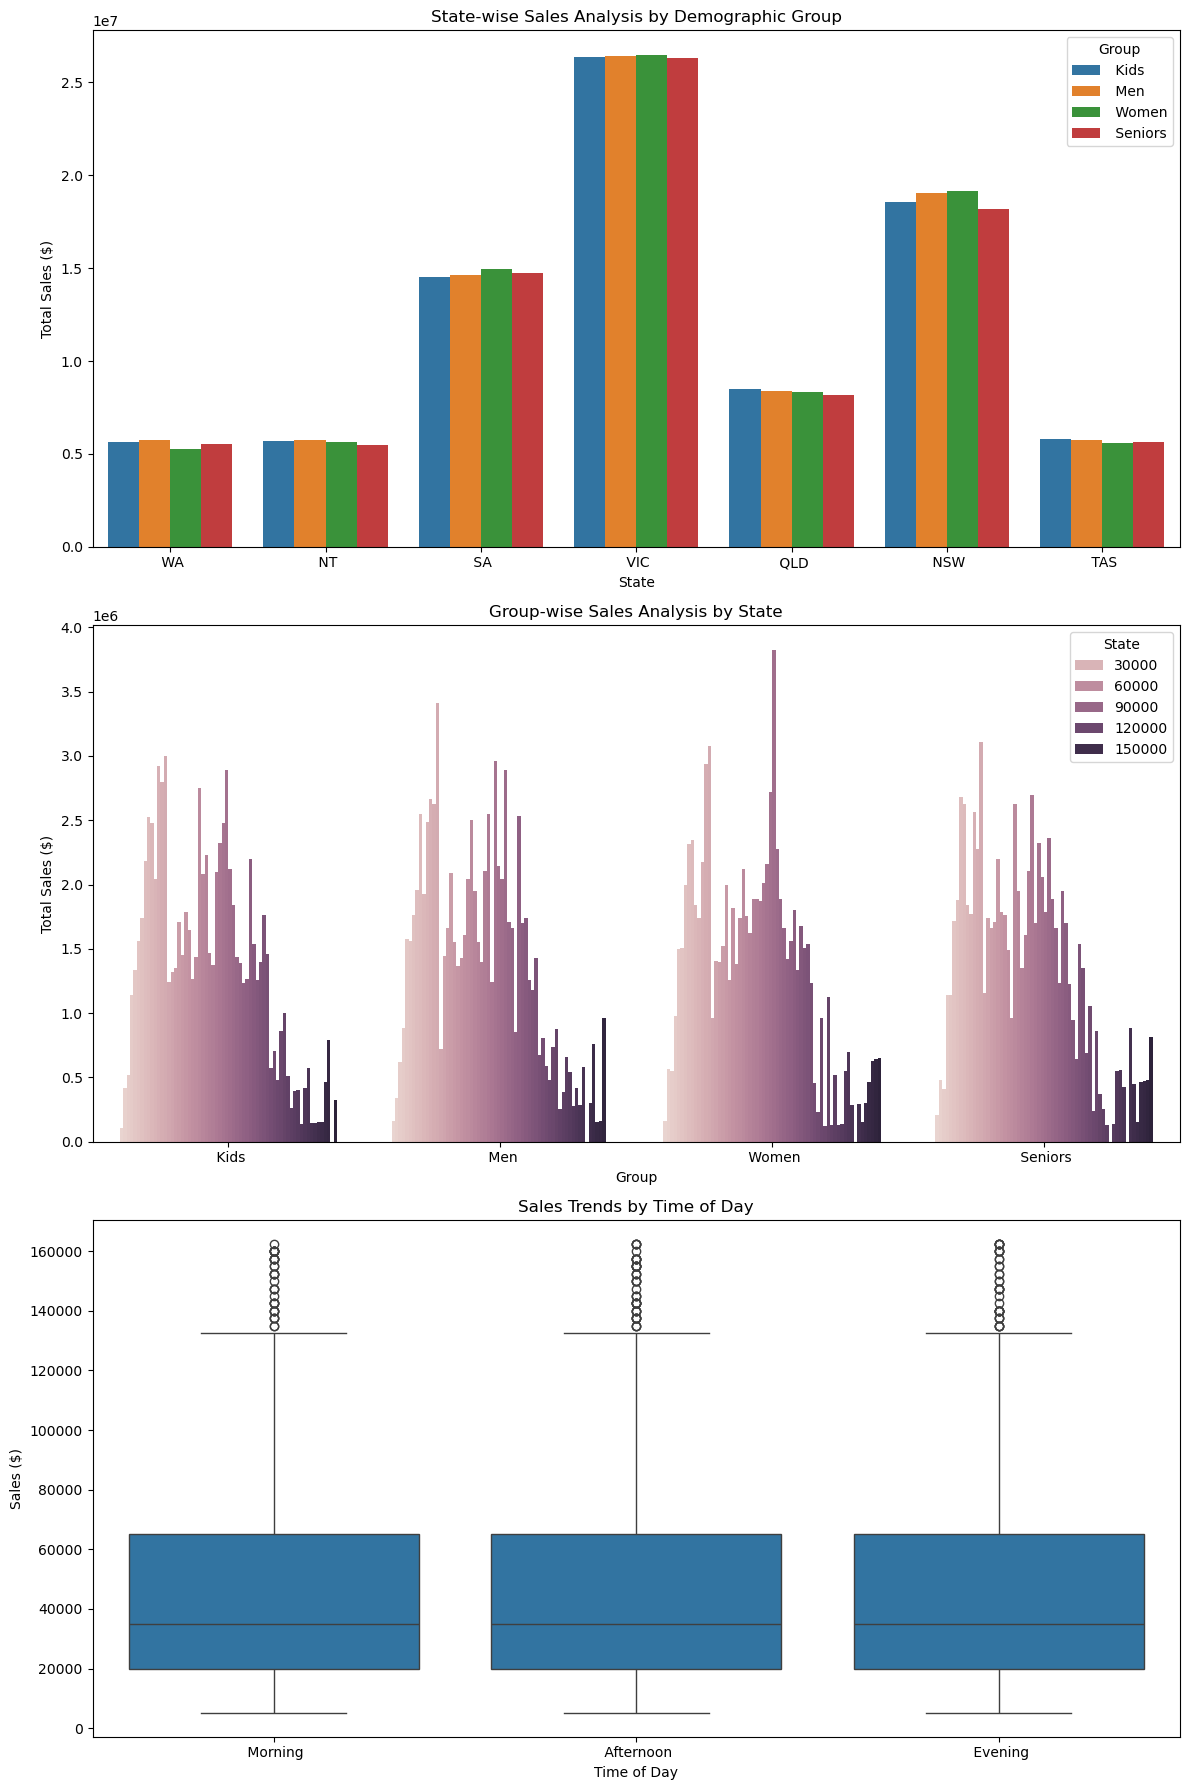

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('AusApparalSales4thQrt2020.csv', parse_dates=['Date'], dtype={'Time': str, 'State': str, 'Group': str})
# Convert Date column to datetime format for better handling
df["Date"] = pd.to_datetime(df["Date"])

# Set up the figure layout
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# 1. State-wise sales analysis by demographic group
sns.barplot(data=df, x="State", y="Sales", hue="Group", estimator=sum, ci=None, ax=axes[0])
axes[0].set_title("State-wise Sales Analysis by Demographic Group")
axes[0].set_ylabel("Total Sales ($)")
axes[0].set_xlabel("State")
axes[0].legend(title="Group")

# 2. Group-wise sales analysis by demographic group
sns.barplot(data=df, x="Group", y="Sales", hue="Sales", estimator=sum, errorbar=None,ax=axes[1])
axes[1].set_title("Group-wise Sales Analysis by State")
axes[1].set_ylabel("Total Sales ($)")
axes[1].set_xlabel("Group")
axes[1].legend(title="State")

# 3. Sales trends by time of day
sns.boxplot(data=df, x="Time", y="Sales", ax=axes[2])
axes[2].set_title("Sales Trends by Time of Day")
axes[2].set_ylabel("Sales ($)")
axes[2].set_xlabel("Time of Day")

# Adjust layout and show plot
plt.tight_layout()
plt.show()


b. Ensure the visualization is clear and accessible for effective decisionmaking by the head of sales and marketing (S&M).

The dashboard must contain daily, weekly, monthly, and quarterly charts.

(Any visualization library can be used for this purpose. However, since statistical analysis is being done, Seaborn is preferred.)

C:\Users\Keert\AppData\Local\Temp\ipykernel_8872\1179993219.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_sales, x="Month", y="Sales", palette="Blues_r", ax=axes[2])
C:\Users\Keert\AppData\Local\Temp\ipykernel_8872\1179993219.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=quarterly_sales, x="Quarter", y="Sales", palette="Greens_r", ax=axes[3])


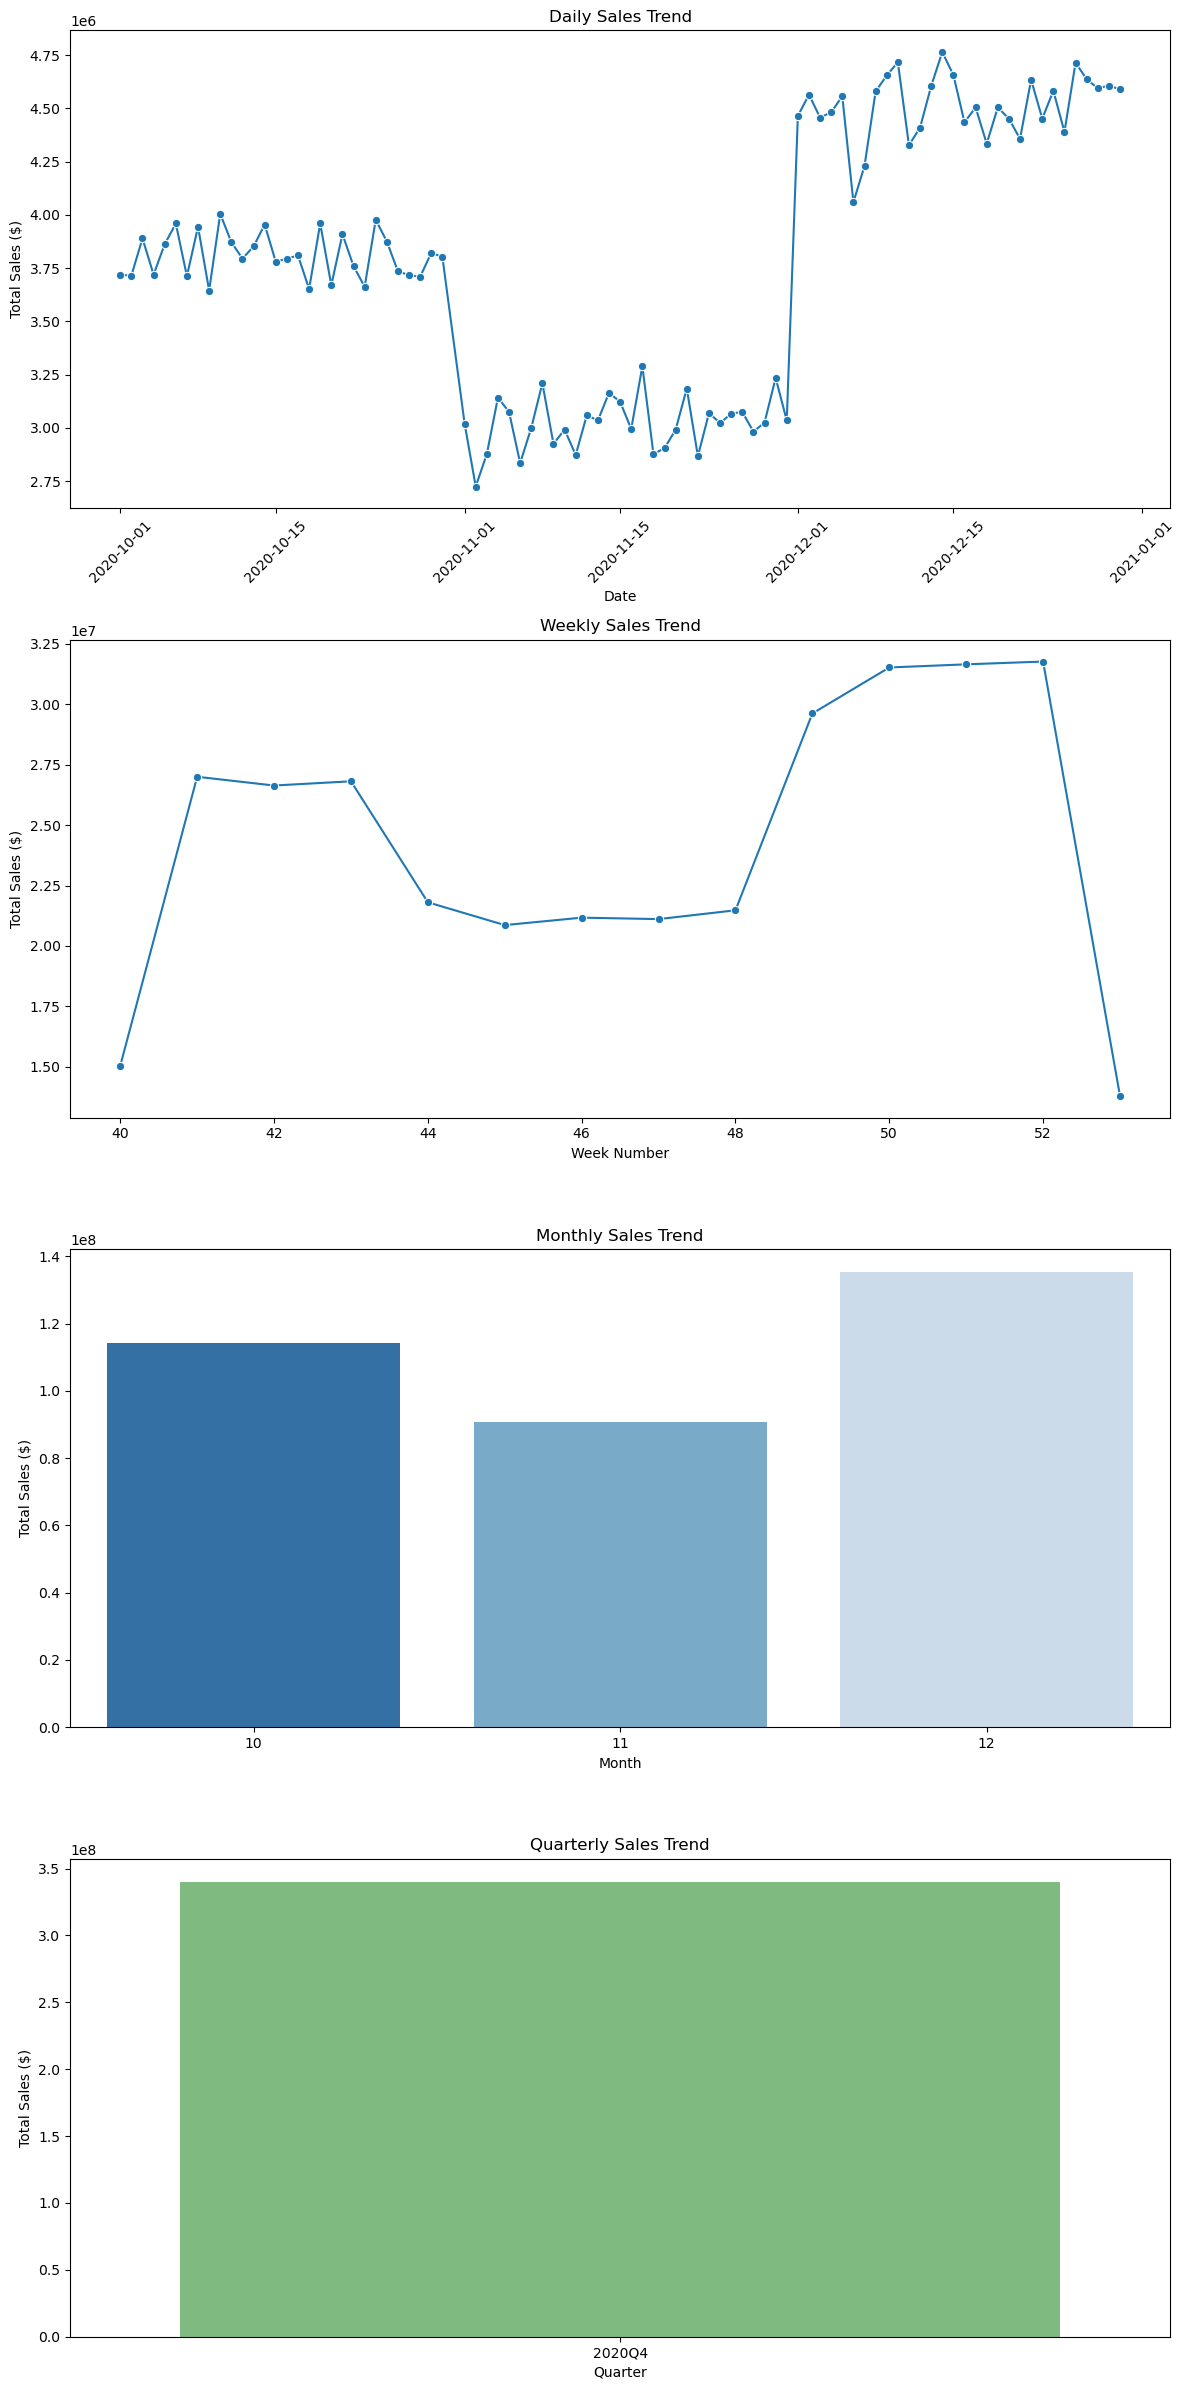

In [21]:
# Create additional time-based columns for aggregation
df["Week"] = df["Date"].dt.isocalendar().week
df["Month"] = df["Date"].dt.month
df["Quarter"] = df["Date"].dt.to_period("Q")

# Set up the figure layout for the extended dashboard
fig, axes = plt.subplots(4, 1, figsize=(12, 24))

# 1. Daily Sales Trend
daily_sales = df.groupby("Date")["Sales"].sum().reset_index()
sns.lineplot(data=daily_sales, x="Date", y="Sales", marker="o", ax=axes[0])
axes[0].set_title("Daily Sales Trend")
axes[0].set_ylabel("Total Sales ($)")
axes[0].set_xlabel("Date")
axes[0].tick_params(axis="x", rotation=45)

# 2. Weekly Sales Trend
weekly_sales = df.groupby("Week")["Sales"].sum().reset_index()
sns.lineplot(data=weekly_sales, x="Week", y="Sales", marker="o", ax=axes[1])
axes[1].set_title("Weekly Sales Trend")
axes[1].set_ylabel("Total Sales ($)")
axes[1].set_xlabel("Week Number")

# 3. Monthly Sales Trend
monthly_sales = df.groupby("Month")["Sales"].sum().reset_index()
sns.barplot(data=monthly_sales, x="Month", y="Sales", palette="Blues_r", ax=axes[2])
axes[2].set_title("Monthly Sales Trend")
axes[2].set_ylabel("Total Sales ($)")
axes[2].set_xlabel("Month")

# 4. Quarterly Sales Trend
quarterly_sales = df.groupby("Quarter")["Sales"].sum().reset_index()
sns.barplot(data=quarterly_sales, x="Quarter", y="Sales", palette="Greens_r", ax=axes[3])
axes[3].set_title("Quarterly Sales Trend")
axes[3].set_ylabel("Total Sales ($)")
axes[3].set_xlabel("Quarter")

# Adjust layout and display
plt.tight_layout()
plt.show()
